## Training Your Own Linear Regressesor

Create a linear regressor, with a Scikit-learn compatible fit-predict interface. You should implement every detail of the linear regressor in Python, using whatever library you want (except a linear regressor itself).

You must investigate and describe all major details for a linear regressor, and implement at least the following concepts (MUST):

### Qa: Concepts and Implementations MUSTS

* the `fit-predict` interface, and a $R^2$ score function,
* one-dimensional output only,
* loss function based on (R)MSE,
* setting of the number of iterations and learning rate ($\eta$) via parameters in the constructor, the signature of your `__init__` must include the named parameters `max_iter` and `eta0`,
* the batch-gradient decent algorithm (GD),
* constant or adaptive learning rate,
* learning graphs,
* stochastic gradient descent (SGD),
* epochs vs iteations,

In [305]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import r2_score

class MyLinearRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, max_iter=1000, eta0=0.01, gd_type='batch'):
        self.max_iter = max_iter # Number of iterations
        self.eta0 = eta0 # Learning rate
        self.gd_type = gd_type # Which fit should be run
        self.weights = None
        self.bias = None
        
    def fit(self, X, y_true):
        m, n = X.shape
        self.weights = np.zeros(n)  # Initialize weights with zeros
        self.bias = 0  # Initialize bias with zero

        #Gemini chatbot has been used to give us the idea to split the fit up
        #So the linear regressor can be initialized with either batch or stochastic gradiant descent 
    
        if self.gd_type == 'batch':
            self.fit_batch_gd(X, y_true)
        elif self.gd_type == 'sgd':
            self.fit_sgd(X, y_true)
        else:
            raise ValueError("Invalid gradient descent type")
        
    #This method has been created by using Gemini chatbot:
    def fit_batch_gd(self, X, y_true):
        m, n = X.shape

        for _ in range(self.max_iter):
            # Calculate predictions
            y_pred = self.predict(X)

            # Calculate errors
            errors = y_pred - y_true

            # Update weights and bias using gradient descent
            self.weights -= self.eta0 * (1/m) * np.dot(X.T, errors)
            self.bias -= self.eta0 * (1/m) * np.sum(errors)
            
    #This method has been created by using Gemini chatbot:  
    def fit_sgd(self, X, y_true):
        m, n = X.shape
        
        for _ in range(self.max_iter):
            for i in range(m):  # Iterate over each example
                random_index = np.random.randint(0, m)  # Pick a random sample
                x_i = X[random_index:random_index + 1]  # Select the ith sample
                y_i = y_true[random_index:random_index + 1]

                # Calculate predictions
                y_pred = self.predict(x_i)

                # Calculate errors
                errors = y_pred - y_i

                # Update weights and bias using gradient descent
                self.weights -= self.eta0 * np.dot(x_i.T, errors)
                self.bias -= self.eta0 * np.sum(errors)

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

    def score(self, X, y):
        return r2_score(y, self.predict(X))

    def RMSE(self, y_pred, y_true):
        # Calculate squared differences (L2)
        squared_diff = (y_true - y_pred) ** 2
        
        # Compute mean of squared differences
        mean_squared_diff = np.mean(squared_diff)
        
        # Take square root to obtain RMSE
        rmse_value = np.sqrt(mean_squared_diff)
        
        return rmse_value
    
    # From our own previous assignment
    def checkInputSameShape(self, y_pred, y_true):
        assert y_pred.shape == y_true.shape, "Shape of input is not equal!"



### Qc: Testing and Test Data

In the following exercise the Iris data has been used to test the regressors by fitting them with the data. Following this the RMSE score will be found and compared between the batch- and stochastic gradiant descent.

RMSE score from the batch regressor: 0.224463870262065
RMSE score from the sgd regressor: 0.2480593024873955

It is seen that the batch regressor in most cases has a lower RMSE score than the sgd regressor

This can also be visually represented by plotting the predictions and comparing these with the true value


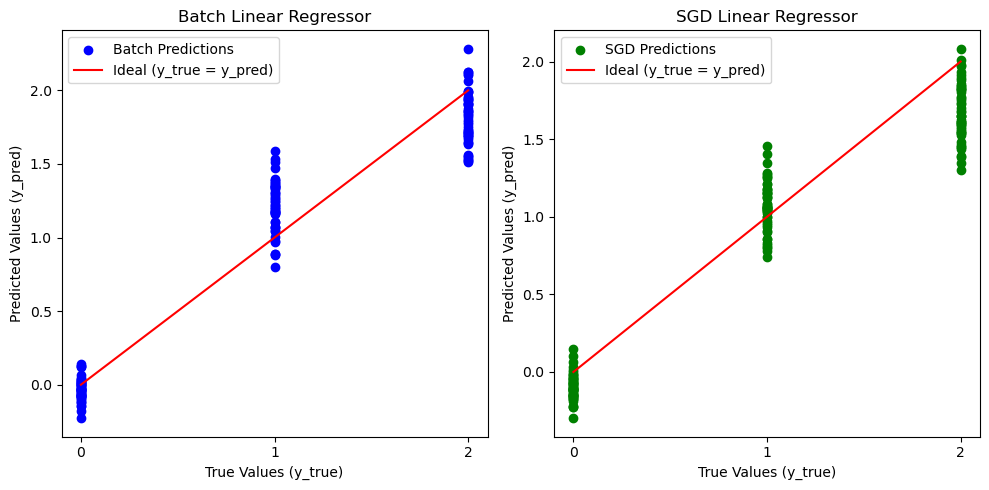

In [306]:
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y_true = iris.target

# Init the linear regressor, batch and sgd:
regressor_batch = MyLinearRegressor(gd_type="batch")
regressor_sgd = MyLinearRegressor(gd_type="sgd")

# Fit linear regressor with iris data:
regressor_batch.fit(X, y_true)
regressor_sgd.fit(X,y_true)

# Make prediction for batch:
y_pred_batch = regressor_batch.predict(X)
rmse_batch = regressor_batch.RMSE(y_pred_batch, y_true)
print(f"RMSE score from the batch regressor: {rmse_batch}")

# Make prediction for sgd:
y_pred_sgd = regressor_sgd.predict(X)
rmse_sgd = regressor_sgd.RMSE(y_pred_sgd, y_true)
print(f"RMSE score from the sgd regressor: {rmse_sgd}")

print("\nIt is seen that the batch regressor in most cases has a lower RMSE score than the sgd regressor")

print("\nThis can also be visually represented by plotting the predictions and comparing these with the true value")
plt.figure(figsize=(10, 5))

# Batch Regressor
plt.subplot(1, 2, 1)
plt.scatter(y_true, y_pred_batch, color='blue', label='Batch Predictions')
plt.plot(y_true, y_true, color='red', label='Ideal (y_true = y_pred)')  # Ideal line
plt.xlabel('True Values (y_true)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Batch Linear Regressor')
plt.legend()
plt.xticks([0, 1, 2]) # Three flower types

# SGD Regressor
plt.subplot(1, 2, 2)
plt.scatter(y_true, y_pred_sgd, color='green', label='SGD Predictions')
plt.plot(y_true, y_true, color='red', label='Ideal (y_true = y_pred)')  # Ideal line
plt.xlabel('True Values (y_true)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('SGD Linear Regressor')
plt.legend()
plt.xticks([0, 1, 2]) # Three flower types

plt.tight_layout()
plt.show()

### Qd: The Journaling of Your Regressor 

For the journal, write a full explanation of how you implemented the linear regressor, including a code walk-through (or mini-review of the most interesting parts).

### Qe: Mathematical Foundation for Training a Linear Regressor

You must also include the theoretical mathematical foundation for the linear regressor using the following equations and graphs (free to include in your journal without cite/reference), and relate them directly to your code:

### Qf: Smoke testing

Once ready, you can test your regressor via the test stub below, or create your own _test-suite_.

Be aware that setting the stepsize, $\eta$, value can be tricky, and you might want to tune `eta0` below.

In [307]:
# Mini smoke test for your linear regressor...

import sys
import numpy

def PrintOutput(msg, pre_msg, ex=None, color="", filestream=sys.stdout):
    #BLACK    ="\033[0;30m"
    #BLUE     ="\033[0;34m"
    #LBLUE    ="\033[1;34m"
    #RED      ="\033[0;31m"
    #LRED     ="\033[1;31m"
    #GREEN    ="\033[0;32m"
    #LGREEN   ="\033[1;32m"
    #YELLOW   ="\033[0;33m"
    #LYELLOW  ="\033[1;33m"
    #PURPLE   ="\033[0;35m"
    #LPURPLE  ="\033[1;35m"
    #CYAN     ="\033[0;36m"
    #LCYAN    ="\033[1;36m"
    #BROWN    ="\033[0;33m"
    #DGRAY    ="\033[1;30m"
    #LGRAY    ="\033[0;37m"
    #WHITE    ="\033[1;37m"
    #NC       ="\033[0m"
    color_end = "\033[0m" if color!="" else ""
    if ex is not None:
        msg += f"\n   EXCEPTION: {ex} ({type(ex)})"
    print(f"{color}{pre_msg}{msg}{color_end}", file=filestream)

def Warn(msg, ex=None):
    PrintOutput(msg, "WARNING: ", ex, "\033[1;33m")

def Err(msg, ex=None):
    PrintOutput(msg, "ERROR: ", ex, "\033[1;31m" )
    exit(-1)

def Info(msg):
    PrintOutput(msg, "", None, "\033[1;35m")

def SimplePrintMatrix(x, label="", precision=12):
    # default simple implementation, may be overwritten by a libitmal function later..
    print(f"{label}{' ' if len(label)>0 else ''}{x}")

def SimpleAssertInRange(x, expected, eps):
    #assert isinstance(x, numpy.ndarray)
    #assert isinstance(expected, numpy.ndarray)
    #assert x.ndim==1 and expected.ndim==1
    #assert x.shape==expected.shape
    assert eps>0
    assert numpy.allclose(x, expected, eps) # should rtol or atol be set to eps?

def GenerateData():
    X = numpy.array([[8.34044009e-01],[1.44064899e+00],[2.28749635e-04],[6.04665145e-01]])
    y = numpy.array([5.97396028, 7.24897834, 4.86609388, 3.51245674])
    return X, y

def TestMyLinReg(_gd_type = "batch"):
    X, y = GenerateData()

    try:
        # assume that your regressor class is named 'MyLinReg', please update/change
        regressor = MyLinearRegressor(gd_type=_gd_type)
    except Exception as ex:
        Err("your regressor has another name, than 'MyLinReg', please change the name in this smoke test", ex)

    try:
        regressor = MyLinearRegressor(max_iter=1000, eta0=0.1, gd_type=_gd_type)
    except Exception as ex:
        Err("your regressor can not be constructed via the __init_ (with two parameters, see call above", ex)

    try:
        regressor.fit(X, y)
    except Exception as ex:
        Err("your regressor can not fit", ex)

    try:
        y_pred = regressor.predict(X)
        Info(f"y_pred = {y_pred}")
    except Exception as ex:
        Err("your regressor can not predict", ex)

    try:
        score  = regressor.score(X, y)
        Info(f"SCORE = {score}")
    except Exception as ex:
        Err("your regressor fails in the score call", ex)

    try:
        w    = None # default
        bias = None # default
        try:
            w = regressor.weights
            bias = regressor.bias
        except Exception as ex:
            w = None
            Warn("your regressor has no coef_/intercept_ atrributes, trying Weights() instead..", ex)
        try:
            if w is None:
                w = regressor.Weights() # maybe a Weigths function is avalible on you model?
                try:
                    assert w.ndim == 1,     "can only handle vector like w's for now"
                    assert w.shape[0] >= 2, "expected length of to be at least 2, that is one bias one coefficient"
                    bias = w[0]
                    w = w[1:]
                except Exception as ex:
                    w = None
                    Err("having a hard time concantenating our bias and coefficients, giving up!", ex)
        except Exception as ex:
            w = None
            Err("your regressor also has no Weights() function, giving up!", ex)
        Info(f"bias         = {bias}")
        Info(f"coefficients = {w}")
    except Exception as ex:
        Err("your regressor fails during extraction of bias and weights (but is a COULD)", ex)

    try:
        from libitmal.utils import PrintMatrix
    except Exception as ex:
        PrintMatrix = SimplePrintMatrix # fall-back
        Warn("could not import PrintMatrix from libitmal.utils, defaulting to simple function..")

    try:
        from libitmal.utils import AssertInRange
    except Exception as ex:
        AssertInRange = SimpleAssertInRange # fall-back
        Warn("could not import AssertInRange from libitmal.utils, defaulting to simple function..")

    try:
        if w is not None:
            if bias is not None:
                w = numpy.concatenate(([bias], w)) # re-concat bias an coefficients, may be incorrect for your implementation!
            # TEST VECTOR:
            w_expected = numpy.array([4.046879011698, 1.880121487278])
            PrintMatrix(w,          label="\tw         =", precision=12)
            PrintMatrix(w_expected, label="\tw_expected=", precision=12)
            eps = 1E-3 # somewhat big epsilon, allowing some slack..
            AssertInRange(w, w_expected, eps)
            Info("well, good news, your w and the expected w-vector seem to be very close numerically, so the smoke-test has passed!")
        else:
            Warn("cannot test due to missing w information")
    except Exception as ex:
        Err("mini-smoketest on your regressor failed", ex)

print("Results for BATCH:")
TestMyLinReg("batch")

print("\nResults for SGD:")
TestMyLinReg("sgd")

Results for BATCH:
y_pred = [5.61498307 6.75547417 4.04730904 5.18372293]
SCORE = 0.495005642955747
bias         = 4.046878960223288
coefficients = [1.88012155]
	w         =[4.046878960223 1.880121547044]
	w_expected=[4.046879011698 1.880121487278]
well, good news, your w and the expected w-vector seem to be very close numerically, so the smoke-test has passed!

Results for SGD:
y_pred = [5.94225253 7.26867632 4.11900275 5.44068463]
SCORE = 0.4368632584117317
bias         = 4.118502554123433
coefficients = [2.18663518]
	w         =[4.118502554123 2.186635180829]
	w_expected=[4.046879011698 1.880121487278]
ERROR: mini-smoketest on your regressor failed
   EXCEPTION: x=4.118502554123433 is not within the range [4.045879011697999; 4.047879011698] for eps=0.001, got eps=0.07162354242543323 (<class 'AssertionError'>)


## Qh Conclusion

As always, take some time to fine-tune your regressor, perhaps just some code-refactoring, cleaning out 'bad' code, and summarize all your findings
 above. 

In other words, write a conclusion.